In [ ]:
# Achtung normalize und invert sind etwas anders weil pos schon auf 0,1
# Alle Trajektorien sind in einem file für die 6 input arten
# 900 Traj mit je 500 zeitschritten
# die Testtrajektorien sind immer die Enden der 30 Trajektorien (6*5) und 7mal länger

# Vorher T  = [0 , 0.0112] 500 steps
# Jetzt T = [0, 0.0224] 500 steps 
# => Schrittweite verdoppelt    
# Modell normal trainieren und dann bei Vergleich zu Simulink die Simulink Daten interpolieren damit sie gleich lang sind!

In [1]:
from meas_get_data import *
from meas_test_func_fs import * 
from meas_get_data import *
import os
torch.set_default_dtype(torch.float64)
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [2]:
path = r"/home/rdpusr/Documents/ventil_lstm/Experiment_Meassurements/Messungen/messdaten_900traj_500steps.csv"
data =get_data(path, num_inits=0)
data.size()

path_test_data = r"/home/rdpusr/Documents/ventil_lstm/Experiment_Meassurements/Messungen/TEST-Messdaten_30traj_7times500steps.csv"
test_data =get_data(path_test_data, num_inits=0)
test_data.size()

path_test_data_simulink = r"/home/rdpusr/Documents/ventil_lstm/Experiment_Meassurements/Messungen/Messdaten_Simulink_Vergleich.csv"
test_data_simulink =get_data(path_test_data_simulink, num_inits=0)
test_data_simulink.size()

print("data size :", data.size())
print("test_data size: ", test_data.size())
print("test_data_simulink size: ", test_data_simulink.size())


path_festo_data= r"/home/rdpusr/Documents/ventil_lstm/Experiment_Meassurements/Messungen/FESTO_testdaten.csv"
festo_data =get_data(path_festo_data, num_inits=0)
festo_data.size()

data size : torch.Size([908, 500, 4])
test_data size:  torch.Size([30, 3500, 4])
test_data_simulink size:  torch.Size([30, 3500, 4])


torch.Size([1, 134179, 4])

In [ ]:


visualise(normalize_invert(festo_data),0)


In [ ]:

for i in range(10):
  visualise(normalize_invert(test_data_simulink),i)
  visualise(normalize_invert(test_data),i)


# for i in range(30):
#     print(test_data[i,0,2],test_data_simulink[i,0,2], print(test_data[i,0,2] == test_data_simulink[i,0,2]))
#     print(test_data[i,0,3],test_data_simulink[i,0,3], print(test_data[i,0,3] == test_data_simulink[i,0,3]))

In [ ]:
visualise(normalize_invert(data),89)
visualise(normalize_invert(data),91)
visualise(normalize_invert(data),92)

In [ ]:
%matplotlib inline

In [ ]:
%matplotlib qt

torch.Size([30, 3500, 4]) torch.Size([908, 500, 4])


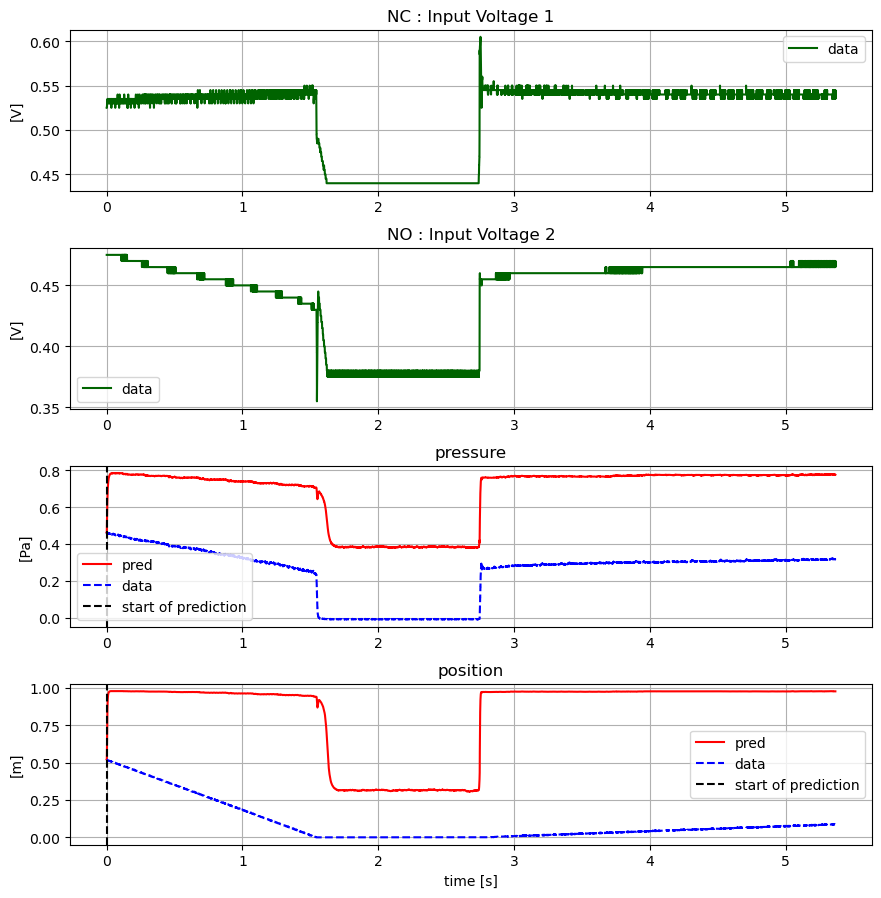

0.3993107078863666

In [13]:

params_lstm =    {
                        "window_size" : 16,
                        "h_size" : 8,
                        "l_num" : 3,
                        "learning_rate" : 0.001,
                        "batch_size" : 20,

                        "percentage_of_data" : 0.8,
                        "cut_off_timesteps" : 0,
                        "part_of_data" : 0,
                        "epochs" : 1000,
                        "test_every_epochs" : 100,

                        "T_max" : 500,

                        "experiment_number" : np.random.randint(0,1000)
                        }


if os.name == "nt":
    path_train_data=r"C:\Users\strasserp\Documents\ventil_lstm\Experiment_Meassurements\Messungen\messdaten_900traj_500steps.csv"
    path_test_data = r"C:\Users\strasserp\Documents\ventil_lstm\Experiment_Meassurements\Messungen\TEST-Messdaten_30traj_7times500steps.csv"

else:
    path_train_data=r"/home/rdpusr/Documents/ventil_lstm/Experiment_Meassurements/Messungen/messdaten_900traj_500steps.csv"
    path_test_data = r"/home/rdpusr/Documents/ventil_lstm/Experiment_Meassurements/Messungen/TEST-Messdaten_30traj_7times500steps.csv"

test_data = get_data(path_test_data,num_inits=0)
train_data = get_data(path_train_data,num_inits=0)
print(test_data.size(), train_data.size())
 

model_lstm = OR_LSTM(input_size=4, hidden_size=params_lstm["h_size"], out_size=2, layers=params_lstm["l_num"], window_size=params_lstm["window_size"]).to(device)
model_lstm2 = OR_LSTM(input_size=4, hidden_size=params_lstm["h_size"], out_size=2, layers=params_lstm["l_num"], window_size=params_lstm["window_size"]).to(device)

path_lstm2=r"/home/rdpusr/Documents/ventil_lstm/Experiment_Meassurements/or_lstm_0_126.pth" #new best , error vs old best: 0.004 0.0017
model_lstm2.load_state_dict(torch.load(path_lstm2, map_location=torch.device(device)))

#test(test_data.to(device), model_lstm, model_type="lstm", window_size=params_lstm["window_size"], display_plots=True, numb_of_inits = 1, fix_random=True)
#a=test(test_data.to(device), model_lstm, model_type="lstm", window_size=params_lstm["window_size"], display_plots=False, numb_of_inits = 20, fix_random=True, specific_index=-1)
k=0 # 2 x PaulW traj
k=5 # 2 x PaulW traj mirrored
k=10 # 2 x PaulW NO=NC
k=15 # NO random walk
k=20 # NC random walk
k=25 # NC/NO random walk

k=5

test(festo_data[:,:,:].to(device), model_lstm2, model_type="lstm", window_size=params_lstm["window_size"], display_plots=True,numb_of_inits = 0, fix_random=True, specific_index=0, error_histogramm=False)


In [7]:

festo_data.size()


torch.Size([1, 134179, 4])

In [9]:


import torch
from meas_get_data import *
from meas_NN_classes import *
from meas_dataloader_fs import *
from meas_test_func_fs import *

device = "cuda:0" if torch.cuda.is_available() else "cpu"

def plot_results(x, pred, rescale=False, window_size=1, sim_data_index=0):
    
    if rescale:
        x = normalize_invert(x)
        pred = normalize_invert(pred)

    if x.dim() == 3:
        x = x.view(x.size(dim=1), x.size(dim=2))
    if pred.dim() == 3:
        pred = pred.view(pred.size(dim=1), pred.size(dim=2))



    figure , axs = plt.subplots(4,1, figsize=(9,9))
    figure.tight_layout(pad=2.0)

    stepsize = 2 * 2e-5 
    time = np.linspace(0,x.size(dim=0)* stepsize, x.size(dim=0))

    axs[0].plot(time, x.detach().cpu().numpy()[:, 0], color="darkgreen", label="data")
    axs[0].set_title("NC : Input Voltage 1")
    axs[0].set_ylabel("[V]")

    axs[1].plot(time, x.detach().cpu().numpy()[:, 1], color="darkgreen", label="data")
    axs[1].set_title("NO : Input Voltage 2")
    axs[1].set_ylabel("[V]")

    axs[2].plot(time, pred.detach().cpu().numpy()[:, 2], color="red", label="pred")
    axs[2].plot(time, x.detach().cpu().numpy()[:, 2], color="blue", label="data", linestyle="dashed")
    axs[2].set_title("pressure")
    axs[2].set_ylabel("[Pa]")

    axs[3].plot(time, pred.detach().cpu().numpy()[:, 3], color="red", label="pred")
    axs[3].plot(time, x.detach().cpu().numpy()[:, 3], color="blue", label="data", linestyle="dashed")
    axs[3].set_title("position")
    axs[3].set_ylabel("[m]")
    axs[3].set_xlabel(f"time [s]")

    axs[2].axvline(x=time[window_size], color='black', linestyle='--', label='start of prediction')
    axs[3].axvline(x=time[window_size], color='black', linestyle='--', label='start of prediction')

    path_test_data_simulink = r"/home/rdpusr/Documents/ventil_lstm/Experiment_Meassurements/Messungen/Messdaten_Simulink_Vergleich.csv"
    test_data_simulink = get_data(path_test_data_simulink, num_inits=0)

    if sim_data_index >= 0 and pred.size(dim=1)==test_data_simulink.size(dim=1):
        
        #test_data_simulink[id,:,2]
        axs[2].plot(time, test_data_simulink[sim_data_index,:,2], color="orange", label="pressure_simulink")
        axs[3].plot(time, test_data_simulink[sim_data_index,:,3], color="orange", label="position_simulink")


    if rescale:
        u1_max = 200  #Spannung in [V]              ... [0, 200]
        u1_min = 0
        u2_max = 200
        u2_min = 0
        p_max = 3.5*1e5 #Druck in [bar]             ... [1, 3.5]
        p_min = 1.0*1e5 #Umgebungsdruck in [bar]
        s_max = 0.605*1e-3     #Position [m]          ... [0, 0.0006]
        s_min = 0.0

        axs[0].set_ylim(u1_min-10, u1_max+10)
        axs[1].set_ylim(u2_min-10, u2_max+10)
        axs[2].set_ylim(p_min-0.1*p_max, p_max+0.1*p_max)
        axs[3].set_ylim(s_min-+0.1*s_max, s_max+0.1*s_max)

    for i in range(4):
        axs[i].grid(True)
        axs[i].legend()



    plt.grid(True)
    plt.legend()
    plt.show()


def plot_histogramm(error_position : list,
                    error_pressure : list,
                    error_position_simulink : list,
                    error_pressure_simulink : list)->None:
    
    SMALL_SIZE = 15
    MEDIUM_SIZE = 25
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=15)    # legend fontsiz

    params = {'axes.titlesize': 20}
    plt.rcParams.update(params)

    fig, (ax1, ax2) = plt.subplots(2, 1)#, figsize=(9,9))  # Create a figure with 2 subplots

    bins = 5
    ax1.hist(error_position, alpha=0.5, label='position neural net', color='red', edgecolor = "black", hatch = "//", linewidth=2)
    ax1.hist(error_position_simulink, alpha=0.3, label='position simulink', color='green', edgecolor = "black", hatch = "||", linewidth=2)
    
    ax1.axvline(np.array(error_position).mean(), color='orange', linewidth=2, label=f"Mean {np.round(np.array(error_position).mean(),5)}: MSE position")
    ax1.axvline(np.array(error_position_simulink).mean(), color='blue', linewidth=2, label=f"Mean {np.round(np.array(error_position_simulink).mean(),5)}: MSE position simulink")
    
    ax1.set_xlabel('MSE position')
    ax1.legend()
    ax1.grid(True)

    # Plot C and D in the second subplot (ax2)
    ax2.hist(error_pressure, bins=bins, alpha=0.5, label='pressure neural net', color='red', edgecolor = "black", hatch = "//", linewidth=2)
    ax2.hist(error_pressure_simulink, bins=bins, alpha=0.3, label='pressure simulink', color='green', edgecolor = "black", hatch = "||", linewidth=2)

    ax2.axvline(np.array(error_pressure).mean(), color='orange', linewidth=2, label=f"Mean {np.round(np.array(error_position).mean(),5)}: MSE pressure")
    ax2.axvline(np.array(error_pressure_simulink).mean(), color='blue', linewidth=2, label=f"Mean {np.round(np.array(error_position_simulink).mean(),5)}: MSE pressure simulink")
    
    ax2.set_xlabel('MSE pressure')
    ax2.legend()
    ax2.grid(True)

    ax1.set_ylabel(f"frequency", fontsize=15)
    ax2.set_ylabel(f"frequency", fontsize=15)

    # Display the figure
    plt.tight_layout()
    plt.show()
    
    return

# def test(data, model, model_type="lstm", window_size=1 ,display_plots=False,\
#           numb_of_inits=1, fix_random=True, rescale=False, specific_index=-1, error_histogramm: bool = False):

def test(
    data, 
    model, 
    model_type: str = "lstm", 
    window_size: int = 1, 
    display_plots: bool = False, 
    numb_of_inits: int = 1, 
    fix_random: bool = True, 
    rescale: bool = False, 
    specific_index: int = -1, 
    error_histogramm: bool = False
) -> float:


    if fix_random:
     np.random.seed(1234)
    else:
     np.random.seed(seed=None)
      
    test_inits = data.size(dim=0)
    ids = np.random.choice(test_inits, min([numb_of_inits, test_inits]), replace=False)
    ids = np.unique(ids)

    

    if specific_index >= 0:
        data = data[specific_index:specific_index+1,:, :]
    else :
        if not plot_histogramm: #use all data for histogramm
         data = data[ids,:, :]   

    loss_fn = nn.MSELoss()
    timesteps = data.size(dim=1)

    total_loss = 0

    error_position = []
    error_pressure = []

    path_test_data_simulink = r"/home/rdpusr/Documents/ventil_lstm/Experiment_Meassurements/Messungen/Messdaten_Simulink_Vergleich.csv"
    test_data_simulink = get_data(path_test_data_simulink, num_inits=0)
    error_position_simulink = []
    error_pressure_simulink = []

    for i, x in enumerate(data):

        with torch.inference_mode():
            if model_type == "lstm":
                x=x.to(device)        
                x = x.view(1,x.size(dim=0), x.size(dim=1))                
                pred = torch.zeros((timesteps, 4), device=device)

                pred[0:window_size, :] = x[0, 0:window_size, :]
                pred[:, 0] = x[0, :, 0]

                x_test = x.clone()
                x_test[:,window_size:,2:] = 0
                x_test = x_test.to(device)

                out, _ = model(x_test) 
                pred[window_size:,2:] = out

                total_loss += loss_fn(pred[window_size:, 2:], x[0, window_size:, 2:]).detach().cpu().numpy()

                error_position.append(loss_fn(pred[window_size:, 2:3], x[0, window_size:, 2:3]).detach().cpu().numpy())
                error_pressure.append(loss_fn(pred[window_size:, 3:4], x[0, window_size:, 3:4]).detach().cpu().numpy())

                if test_data_simulink.size(dim=1) == x.size(dim=1):
                    error_position_simulink.append(loss_fn(test_data_simulink[i, window_size:data.size(dim=1), 2:3], x[0, window_size:, 2:3]).detach().cpu().numpy())
                    error_pressure_simulink.append(loss_fn(test_data_simulink[i, window_size:data.size(dim=1), 3:4], x[0, window_size:, 3:4]).detach().cpu().numpy())

                if display_plots:
                    if specific_index>=0:
                        plot_results(x, pred, rescale=rescale, window_size=window_size, sim_data_index=specific_index)
                    else:
                        plot_results(x, pred, rescale=rescale, window_size=window_size, sim_data_index=ids[i])
    
    if error_histogramm:
        
        plot_histogramm(error_position, error_pressure, error_position_simulink, error_pressure_simulink)

    return total_loss/data.size(0)